In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import models
import data

In [2]:
import argparse

# Hyperparameters

parser = argparse.ArgumentParser()

parser.add_argument("--in_channels",      type=int,   default=3,   help="number of channels on input")
parser.add_argument("--out_channels",     type=int,   default=3,   help="number of channels on output")

parser.add_argument("--unet_depth",       type=int,   default=7,   
                    help="number of downsamplings on unet: image shape should equal [2^depth, 2^depth]")
parser.add_argument("--unet_out_f",       type=int,   default=64,  help="n of filters in the last conv layer of unet")
parser.add_argument("--unet_conv_kernel", type=int,   default=4,   help="kernel size on unet conv layers")
parser.add_argument("--unet_conv_stride", type=int,   default=2,   help="stride on unet conv layers")
parser.add_argument("--unet_conv_pad",    type=int,   default=1,   help="padding on unet conv layers")
parser.add_argument("--unet_dropout",     type=float, default=0.5, help="dropout rate on unet")
parser.add_argument("--unet_lrelu_slope", type=float, default=0.2, help="slope of leaky relu on unet")

parser.add_argument('-f', '--file', help='Path for input file. First line should contain number of lines to search in')

hps = parser.parse_args()

In [ ]:
def imshow(img, title=''):
    """Plot the image batch.
    """
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(np.transpose( img.numpy(), (1, 2, 0)), cmap='gray')
    plt.show()

In [6]:
import matplotlib.pyplot as plt

generator = data.DummyGenerator()
X, Y = generator.generate_rectangles()

dataset = data.CustomTensorDataset(tensors=(X, Y))
loader = torch.utils.data.DataLoader(dataset, batch_size=16)

In [7]:
# Test forward pass with upsampled dummy data

from torch.autograd import Variable

G = models.Unet(hps, hps.in_channels, hps.out_channels, hps.unet_out_f, hps.unet_depth, True)

u = torch.nn.Upsample(scale_factor=4)

x, _ = dataset[0]
x = x.unsqueeze(0)
x = Variable(x)
x = u(x)

hat_y = G(x)


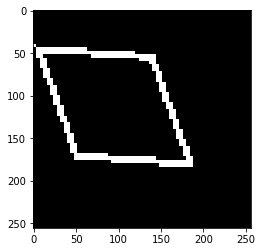

In [8]:
import matplotlib.pyplot as plt
x = x.squeeze(0)
plt.imshow(x.permute(1, 2, 0))

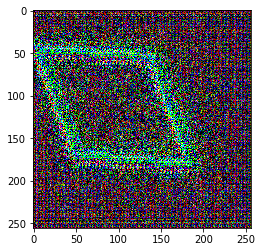

In [9]:
hat_y = hat_y.squeeze(0).detach()
plt.imshow(hat_y.permute(1, 2, 0))

In [10]:
# Test forward pass with upsampled dummy data

from torch.autograd import Variable

D = models.Discriminator(input_c=6)

u = torch.nn.Upsample(scale_factor=4)

x, y = dataset[0]
xy = torch.cat((x, y), dim=0)
xy = xy.unsqueeze(0)
xy = Variable(xy)
xy = u(xy)

xy = D(xy)
xy.shape

torch.Size([1, 1, 7, 7])

In [11]:
x = x.unsqueeze(0)
hat_y = hat_y.unsqueeze(0)

x = u(x)

hat_xy = torch.cat((x, hat_y), dim=1)
hat_xy = Variable(hat_xy)


hat_xy = D(hat_xy)
hat_xy.shape

torch.Size([1, 1, 7, 7])